### TASK 2: PREDICTION USING UNSUPERVISED MACHINE LEARNING

PREDICTING OPTIMUM NUMBER OF CLUSTERS FROM 'IRIS' DATASET USING SOME OF THE BASICS OF K-MEANS CLUSTERING.

### GRIP MAY 21
### Author: Anushka Roy.

### *STEP 1:Importing the libraries*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

### *STEP 2:  Loading the dataset*

In [3]:
iris = pd.read_csv("C:Iris.csv")
iris.drop(["Id"],axis=1,inplace=True)
iris.head() # See the first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### *STEP 3: Finding unique features in species column*

In [4]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Thus we can see that Iris-setosa,Iris-versicolor and Iris-virginica are three unique levels for species 

### *STEP 4: Adjusting the data* 

In [5]:
features= iris .loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]] 

### *STEP 5: Finding the optimum number of clusters for K-means classification*

SciKit-Learn implementation is used for K Means Clustering

In [6]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=100)

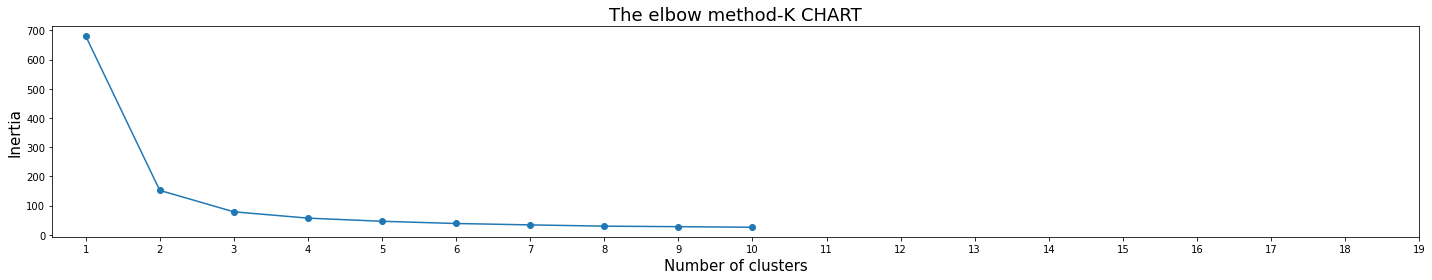

In [21]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(20,4))
plt.plot(range(1, 11), wcss,"-o")
plt.title('The elbow method-K CHART',fontsize=18)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15) # Within cluster sum of squares
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we can conclude 3 is the best value for clusters.

### *STEP 6: Double checking K=3 using visual representation.*

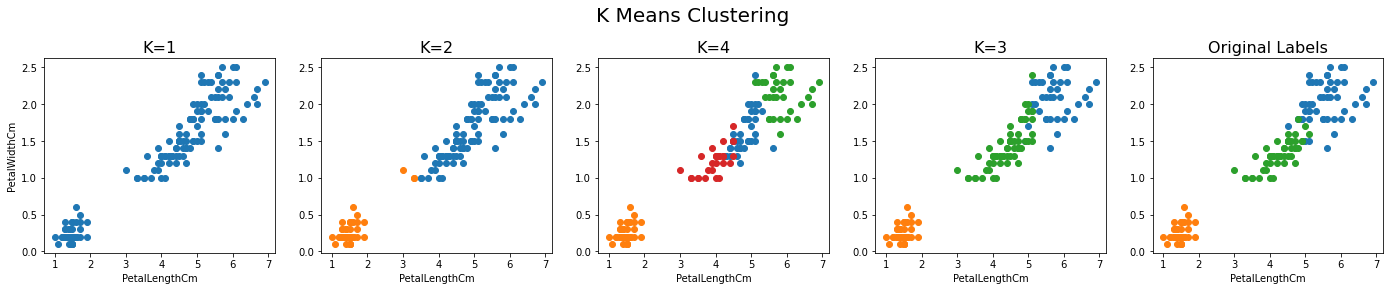

In [19]:
plt.figure(figsize=(24,4))
plt.suptitle("K Means Clustering",fontsize=20)

plt.subplot(1,5,1)
plt.title("K=1",fontsize=16) # Plot for K=1
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.PetalLengthCm,features.PetalWidthCm)

plt.subplot(1,5,2)
plt.title("K=2",fontsize=16) # Plot for K=2
plt.xlabel("PetalLengthCm")
kmeans= KMeans(n_clusters=2)
features["labels"]= kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels==0],features.PetalWidthCm[features.labels==0])
plt.scatter(features.PetalLengthCm[features.labels==1],features.PetalWidthCm[features.labels==1])

# We drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,4)
plt.title("K=3",fontsize=16) # Plot for K=3
plt.xlabel("PetalLengthCm")
kmeans= KMeans(n_clusters=3)
features["labels"]=kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels==0],features.PetalWidthCm[features.labels==0])
plt.scatter(features.PetalLengthCm[features.labels==1],features.PetalWidthCm[features.labels==1])
plt.scatter(features.PetalLengthCm[features.labels==2],features.PetalWidthCm[features.labels==2])

# We drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,3)
plt.title("K=4",fontsize=16) # Plot for K=4
plt.xlabel("PetalLengthCm")
kmeans= KMeans(n_clusters=4)
features["labels"]=kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels==0],features.PetalWidthCm[features.labels==0])
plt.scatter(features.PetalLengthCm[features.labels==1],features.PetalWidthCm[features.labels==1])
plt.scatter(features.PetalLengthCm[features.labels==2],features.PetalWidthCm[features.labels==2])
plt.scatter(features.PetalLengthCm[features.labels==3],features.PetalWidthCm[features.labels==3])

# We drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16) # Plot for original labels
plt.xlabel("PetalLengthCm")
plt.scatter(iris.PetalLengthCm[iris.Species=="Iris-virginica"],iris.PetalWidthCm[iris.Species=="Iris-virginica"])
plt.scatter(iris.PetalLengthCm[iris.Species=="Iris-setosa"],iris.PetalWidthCm[iris.Species=="Iris-setosa"])
plt.scatter(iris.PetalLengthCm[iris.Species=="Iris-versicolor"],iris.PetalWidthCm[iris.Species=="Iris-versicolor"])

plt.subplots_adjust(top=0.8)
plt.show()



*KMeans was the best for K=3 clusters as it is same as that of the plot of the original with labels.Hence Elbow chart was correct*